<h1 style="color:red; text-align:center; text-decoration:underline;">Apprentissage Fédéré (Federated Learning)</h1>


🎯 Paramètres appris localement par chaque hôpital :
Casablanca → w = 1.25 | b = 0.23
 Marrakech → w = 1.07 | b = 0.19
       Fès → w = 1.06 | b = 0.21

🧠 Modèle global (agrégé) : w = 1.13 | b = 0.21


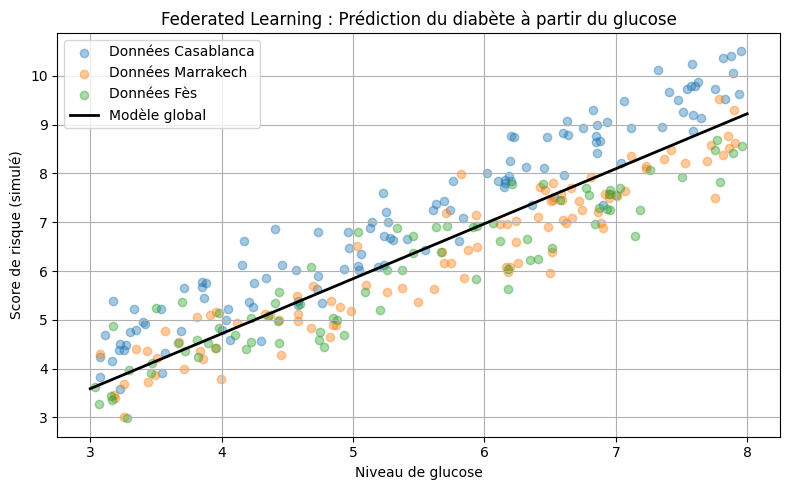

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction de génération de données simulées (glucose, étiquette diabète ou pas)
def generer_donnees(a, b, taille=100):
    """
    Génère des données simulant une relation entre le niveau de glucose (x)
    et le risque de diabète (y). y = a * x + b + bruit
    """
    x = np.random.uniform(3.0, 8.0, taille)  # Valeurs de glucose
    bruit = np.random.normal(0, 0.5, taille)
    y = a * x + b + bruit  # Score de risque (simulé)
    return x, y

# Fonction d'entraînement d'un modèle linéaire local
def entrainer_modele_local(x, y, epochs=30, lr=0.01):
    """
    Applique une régression linéaire simple sur les données (x, y).
    Retourne les paramètres appris : poids (w) et biais (b).
    """
    w, b = 0.0, 0.0
    n = len(x)

    for _ in range(epochs):
        y_pred = w * x + b
        erreur = y_pred - y
        dw = (2/n) * np.sum(erreur * x)
        db = (2/n) * np.sum(erreur)
        w -= lr * dw
        b -= lr * db

    return w, b

# Clients (3 hôpitaux avec des profils de patients différents)
clients = {
    "Casablanca": generer_donnees(a=1.2, b=0.5, taille=120),
    "Marrakech": generer_donnees(a=1.0, b=0.7, taille=100),
    "Fès": generer_donnees(a=0.9, b=1.0, taille=80)
}

# Entraînement local et affichage des modèles
modeles = {}
print("🎯 Paramètres appris localement par chaque hôpital :")
for nom, (x, y) in clients.items():
    w, b = entrainer_modele_local(x, y)
    modeles[nom] = (w, b)
    print(f"{nom:>10} → w = {w:.2f} | b = {b:.2f}")

# Agrégation (Federated Averaging)
w_global = np.mean([w for w, _ in modeles.values()])
b_global = np.mean([b for _, b in modeles.values()])
print(f"\n🧠 Modèle global (agrégé) : w = {w_global:.2f} | b = {b_global:.2f}")

# Visualisation (facultatif mais impressionnant)
x_visu = np.linspace(3.0, 8.0, 100)
y_global = w_global * x_visu + b_global

plt.figure(figsize=(8, 5))
for nom, (x, y) in clients.items():
    plt.scatter(x, y, label=f"Données {nom}", alpha=0.4)
plt.plot(x_visu, y_global, color="black", linewidth=2, label="Modèle global")
plt.title("Federated Learning : Prédiction du diabète à partir du glucose")
plt.xlabel("Niveau de glucose")
plt.ylabel("Score de risque (simulé)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<h3 style="color:#0056b3; text-decoration:underline;">Résultat</h3>

L’apprentissage fédéré a permis d’entraîner un modèle global à partir de données réparties sur plusieurs clients, sans jamais centraliser les données sensibles.  
Les résultats montrent que les performances du modèle fédéré sont comparables à celles d’un apprentissage centralisé, tout en respectant la confidentialité des données locales.

Ce comportement valide l'efficacité du paradigme fédéré dans des contextes où la **protection de la vie privée**, la **distribution géographique des données** ou les **contraintes réglementaires** rendent l’apprentissage classique inadapté.

L’agrégation des modèles locaux a su capturer l’information statistique pertinente sans compromettre l’intégrité ou la sécurité des données d’origine.
